In [180]:
import pandas as pd

In [181]:
# arima: https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

#https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/

#stochastic model

#stationary model

#The stochastic model for which the exponentially weighted moving average
#forecast yields minimum mean square error [212] is a member of a class of nonstationary processes called autoregressive integrated moving average (ARIMA)
#processes, which are discussed in Chapter 4.

#. This wider class of processes provides
#a range of models, stationary and nonstationary, that adequately represent many of
#the time series met in practice.

#As shown
#in Chapter 5, once an appropriate model has been determined for the series, the
#optimal forecasting procedure follows immediately. These forecasting procedures
#include the exponentially weighted moving average forecast as a special case.

In [182]:
df = pd.read_csv(filepath_or_buffer='/home/lneves/Documents/TCC/final_df.csv')

In [183]:
df = df[(df['Date'] <= '2022-07-18') & (df['Date'] >= '2017-01-01')]

In [184]:
df.sort_values(by=['Date'],ascending=True)

,Unnamed: 0,Date,Close,Price
4432,4432,2017-01-02,67136.0,3.2857
4433,4433,2017-01-03,66777.0,3.2652
4434,4434,2017-01-04,66898.0,3.2163
4435,4435,2017-01-05,67940.0,3.1990
4436,4436,2017-01-06,67899.0,3.2241
...,...,...,...,...
5660,5660,2021-09-16,98271.0,5.2535
5661,5661,2021-09-17,97881.0,5.2883
5662,5662,2021-09-20,96121.0,5.3240
5663,5663,2021-09-21,96551.0,5.2699


In [185]:
df.set_index('Date', inplace=True)

In [186]:
df.count()

Unnamed: 0    1233
Close         1233
Price         1233
dtype: int64

In [187]:
df1 = df[['Close','Price']]

In [188]:
import numpy as np

matrix = np.corrcoef(df1['Close'],df['Price'])

In [189]:
matrix

array([[1.        , 0.81416711],
       [0.81416711, 1.        ]])

In [190]:
df1.head()

,Close,Price
Date,,
2017-01-02,67136.0,3.2857
2017-01-03,66777.0,3.2652
2017-01-04,66898.0,3.2163
2017-01-05,67940.0,3.1990
2017-01-06,67899.0,3.2241


In [191]:
#univariável

df2 = df1['Close']

In [192]:
#Running the example, we can see that there is a positive correlation 
# with the first 10-to-12 lags that is perhaps significant for the first 5 lags.

#A good starting point for the AR parameter of the model may be 5.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

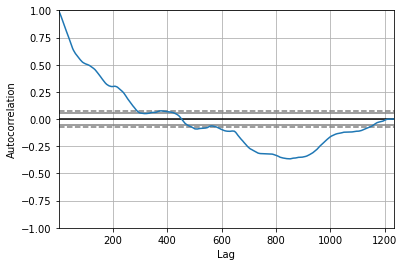

In [193]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df2)

In [194]:
import statsmodels

statsmodels.tsa.stattools.pacf(df2)

array([ 1.        ,  0.99467683,  0.11056229, -0.04580327, -0.02986309,
        0.00798166, -0.05169799,  0.03390092, -0.12471029, -0.02977614,
       -0.00644703, -0.00891439, -0.05689865,  0.01662506,  0.02532678,
       -0.00104481,  0.04093873, -0.01817878, -0.04447371, -0.0179616 ,
        0.05387882,  0.03859546, -0.03873015, -0.0028218 ,  0.03007675,
       -0.02196446,  0.05298118, -0.00617142, -0.05786819,  0.01689836,
       -0.04640847])

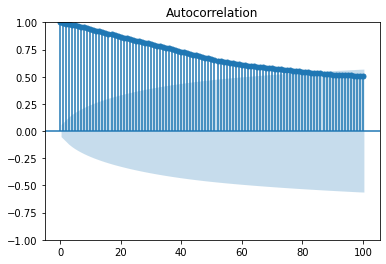

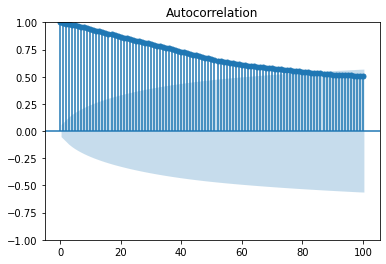

In [195]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df2, lags=100)

/home/lneves/.local/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


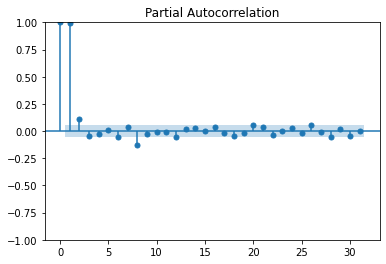

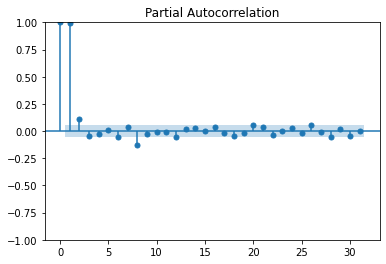

In [196]:
plot_pacf(df2)

In [197]:
from statsmodels.tsa.arima.model import ARIMA

#autoregression = 1000
p = 2
#difference order of 1
diff = 1
#moving average model = 0
q = 1

model = ARIMA(df2, order=(p,1,q))
model_fit = model.fit()

print(model_fit.summary())

/home/lneves/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
/home/lneves/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
/home/lneves/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
/home/lneves/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1233
Model:                 ARIMA(2, 1, 1)   Log Likelihood              -10783.258
Date:                Mon, 08 Aug 2022   AIC                          21574.517
Time:                        20:18:21   BIC                          21594.982
Sample:                    01-02-2017   HQIC                         21582.216
                         - 09-22-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7925      0.076     10.374      0.000       0.643       0.942
ar.L2          0.0978      0.009     10.643      0.000       0.080       0.116
ma.L1         -0.8736      0.077    -11.304      0.0

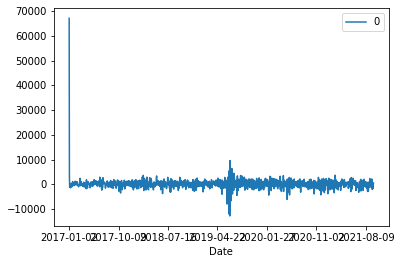

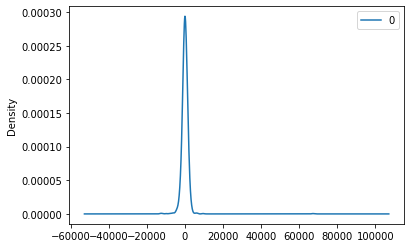

                  0
count   1233.000000
mean      69.726043
std     2449.025981
min   -12818.829531
25%     -763.352992
50%       60.332137
75%      900.282035
max    67136.000000


In [198]:
from matplotlib import pyplot
from pandas import DataFrame

# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

predicted=97445.761765, expected=100774.000000
predicted=100749.491532, expected=100799.000000
predicted=100907.311067, expected=103913.000000
predicted=103838.021497, expected=105351.000000
predicted=105431.497597, expected=104532.000000
predicted=104865.829327, expected=102175.000000
predicted=102361.136939, expected=104512.000000
predicted=104294.381000, expected=106430.000000
predicted=106326.495096, expected=107229.000000
predicted=107313.331952, expected=106483.000000
predicted=106568.666931, expected=106517.000000
predicted=106585.324717, expected=107379.000000
predicted=107345.861374, expected=109786.000000
predicted=109667.801880, expected=110133.000000
predicted=110207.120273, expected=110227.000000
predicted=110325.635433, expected=110575.000000
predicted=110593.364008, expected=108888.000000
predicted=109103.951725, expected=111335.000000
predicted=111113.980342, expected=111814.000000
predicted=111808.997033, expected=112919.000000
predicted=112960.536976, expected=113682.

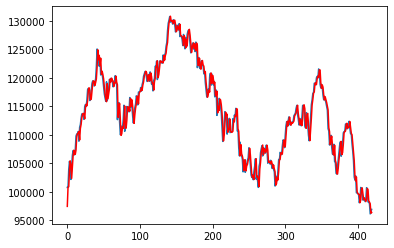

In [199]:
from sklearn.metrics import mean_squared_error
from math import sqrt

series = df1['Close']
# split into train and test sets
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()